In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [55]:
class Door:
    def __init__(self,goat=False,car=False):
        self.selected = False
        self.goat = goat
        self.car = car
        
class monty_hall_problem:
    def __init__(self):
        self.doors = [Door(),Door(),Door()]
        self.hidden_doors = []
        self.randomize()
        
    def randomize(self):
        self.hidden_doors = []
        for d in self.doors:
            d.car=False
            d.goat = False
            self.hidden_doors.append(d)
        np.random.choice(self.doors).car = True
        for d in self.doors:
            if d.car:
                continue
            else:
                d.goat = True
                
    def select(self,door):
        self.doors[door].selected = True
        return self.doors[door]
        
    def reveal(self):
        goats = [door for door in self.doors if (not door.selected and door.goat)]
        chosen = np.random.choice(goats)
        self.hidden_doors.remove(chosen)
        return chosen
    
    def swap(self):
        try:
            if len(self.hidden_doors) == 2:
                for d in self.hidden_doors:
                    if d.selected:
                        d.selected = False
                    else:
                        d.selected = True
                        return d
        except:
            print("Make sure to select and reveal first!")

In [56]:
monty = monty_hall_problem()


dict_items([('Door 1', 348), ('Door 2', 343), ('Door 3', 309)])

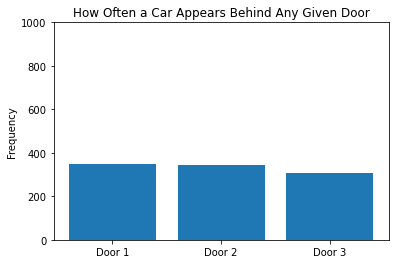

In [49]:
values_dict = {"Door 1": 0,
               "Door 2": 0,
               "Door 3": 0}
for i in range(1000):
    monty.randomize()
    if monty.doors[0].car:
        values_dict["Door 1"] += 1
    if monty.doors[1].car:
        values_dict["Door 2"] += 1
    if monty.doors[2].car:
        values_dict["Door 3"] += 1
plt.bar(values_dict.keys(),values_dict.values())
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.title("How Often a Car Appears Behind Any Given Door")
display(values_dict.items())

In [59]:
results_dict = {'car':0,
                'goat':0}
for i in range(1000):
    monty.randomize()
    chosen_door = monty.select(0)
    monty.reveal()
    if chosen_door.car:
        results_dict['car'] += 1
    else:
        results_dict['goat'] += 1
plt.bar(results_dict.keys(),results_dict.values())
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.title("How Often You Win Without Swapping")
display(results_dict.items())

ValueError: 'a' cannot be empty unless no samples are taken

In [57]:
results_dict = {'car':0,
                'goat':0}
for i in range(1000):
    monty.randomize()
    chosen_door = monty.select(0)
    monty.reveal()
    chosen_door = monty.swap()
    if chosen_door.car:
        results_dict['car'] += 1
    else:
        results_dict['goat'] += 1
plt.bar(results_dict.keys(),results_dict.values())
plt.ylim(0,1000)
plt.ylabel('Frequency')
plt.title("How Often You Win With Swapping")
display(results_dict.items())

ValueError: 'a' cannot be empty unless no samples are taken